In [1]:
import numpy as np
import matplotlib
import sys
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import camb
from camb import model, initialpower

In [2]:
#Set up a new set of parameters for CAMB
#The defaults give one massive neutrino and helium set using BBN consistency
pars = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06,  
                       As=2e-9, ns=0.965, halofit_version='mead', lmax=5000)
pars.set_for_lmax(5000, lens_potential_accuracy=2)
pars.WantTensors = True

In [3]:
#calculate results for these parameters
results = camb.get_results(pars)

## now add tensors keeping at r = 0.008  ## note we can recompute the tenser contribution with out rerunning the scalar part.
inflation_params = initialpower.InitialPowerLaw()
inflation_params.set_params(ns=0.96, r=0.008)

results.power_spectra_from_transfer(inflation_params) #warning OK here, not changing scalars
lmax=5000

## get the Cl's
cl = results.get_total_cls(lmax, CMB_unit='muK')
# ignore the warning-- this is OK

In [4]:
## now save these paramters as a text file for future use
ell_and_cell = np.append(np.arange(np.size(cl[:,0])), cl.transpose().ravel())
ell_and_cell = ell_and_cell.reshape((5,5001))
np.savetxt("CAMB_fiducial_cosmo_scalCls.dat",ell_and_cell.transpose())

Text(0.5, 0, '$\\ell$')

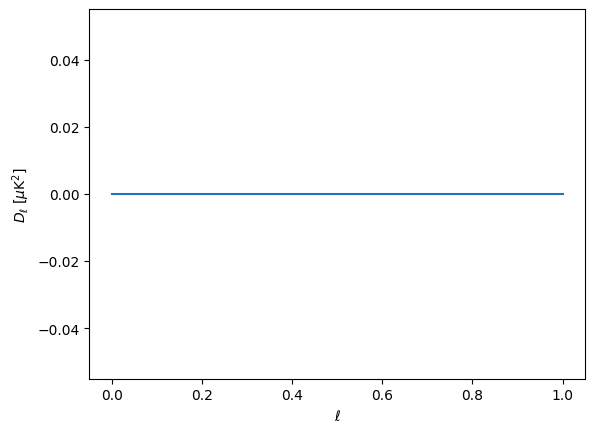

In [5]:
# read in the input CMB spectra
ell, DlTT = np.loadtxt("CAMB_fiducial_cosmo_scalCls.dat", usecols=(0, 1), unpack=True)
plt.plot(ell,DlTT)
plt.ylabel(r'$D_{\ell}$ [$\mu$K$^2$]')
plt.xlabel(r'$\ell$')